# Neural Modeling Methods & Tools
##  SVM 
## - Run SVM(sklearn) and compare results with decision tree



#### Preface
- We decided to work with Michigan dataset as the Decision Tree model performed the best with this data.
- This notebook starts with Decision Tree from Assignment 1, then we move on to objectives of Assignment 3.

#### Importing all necessary libraries

In [2]:
# Libraries
import numpy as np
import pandas as pd

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import cv2
%matplotlib inline

# Tree
from sklearn.tree import export_graphviz

## 1. Michigan Dataset

Reading the Michigan dataset.

In [3]:
# Read data
les = pd.read_csv('data/MI_14840_2013Fall_2014Spring.csv')
les.head(5)

,Date_CST,Time_CST,Date,Time,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),...,Skewness_lon,Skewness_lat,Kurtosis_lon,Kurtosis_lat,Sample Number,Selected,Date_UTC_y,Time_UTC_y,Lake_Visible,LES_Exist
0,20131001,00:00,2013-10-01,00:55,58,77,51,8,160,m,...,0.582646,0.007014,2.816020,1.711882,3.0,s00,20131001.0,06:00,N,N
1,20131001,01:00,2013-10-01,01:55,58,80,52,6,160,m,...,0.660357,0.030175,2.863913,1.689899,4.0,s00,20131001.0,07:00,N,N
2,20131001,02:00,2013-10-01,02:55,57,86,53,5,160,m,...,0.630409,0.023720,2.893504,1.712862,4.0,s00,20131001.0,08:00,N,N
3,20131001,03:00,2013-10-01,03:55,63,86,59,9,190,m,...,0.614300,0.024125,2.869601,1.716328,3.0,s00,20131001.0,09:00,N,N
4,20131001,04:00,2013-10-01,04:55,64,86,60,9,190,m,...,0.684025,0.192531,3.150438,1.765415,4.0,s00,20131001.0,10:00,N,N


In [4]:
print('Total observation count: ', len(les))

Total observation count:  4369


### 1.1 Feature Engineering

#### Renaming columns

In [5]:
les.columns

Index(['Date_CST', 'Time_CST', 'Date', 'Time', 'Temp (F)', 'RH (%)',
       'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)',
       'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)',
       'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)',
       'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)',
       'Wind Chill (F)', 'Heat Index (F)', 'Date_UTC_x', 'Time_UTC_x', 'Mean',
       'Centroid_lon', 'Centroid_lat', 'Std_lon', 'Std_lat', 'Skewness_lon',
       'Skewness_lat', 'Kurtosis_lon', 'Kurtosis_lat', 'Sample Number',
       'Selected', 'Date_UTC_y', 'Time_UTC_y', 'Lake_Visible', 'LES_Exist'],
      dtype='object')

In [6]:
# Renaming
les.rename(columns={"Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   "Sample Number" : "Sample_Number"}, inplace = True)

les.head()

,Date_CST,Time_CST,Date,Time,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,...,Skewness_lon,Skewness_lat,Kurtosis_lon,Kurtosis_lat,Sample_Number,Selected,Date_UTC_y,Time_UTC_y,Lake_Visible,LES_Exist
0,20131001,00:00,2013-10-01,00:55,58,77,51,8,160,m,...,0.582646,0.007014,2.816020,1.711882,3.0,s00,20131001.0,06:00,N,N
1,20131001,01:00,2013-10-01,01:55,58,80,52,6,160,m,...,0.660357,0.030175,2.863913,1.689899,4.0,s00,20131001.0,07:00,N,N
2,20131001,02:00,2013-10-01,02:55,57,86,53,5,160,m,...,0.630409,0.023720,2.893504,1.712862,4.0,s00,20131001.0,08:00,N,N
3,20131001,03:00,2013-10-01,03:55,63,86,59,9,190,m,...,0.614300,0.024125,2.869601,1.716328,3.0,s00,20131001.0,09:00,N,N
4,20131001,04:00,2013-10-01,04:55,64,86,60,9,190,m,...,0.684025,0.192531,3.150438,1.765415,4.0,s00,20131001.0,10:00,N,N


#### Missing value handling in dataframe
- As per the abbr in the table:
    - `m` or `M`: Data is missing
    - `NC`: Wind Chill/Heat Index do not meet the required thresholds to be calculated

Replace the missing values with 0.

In [7]:
# Replace with 0
les = les.replace(['m', 'M'], '0')

Overview of count of `NC` values in **Wind_Chill_F** and **Heat_Index_F**.

In [8]:
# NC values in Wind_Chill_F
les.Wind_Chill_F.value_counts()

NC     1079
11      107
7       104
13       96
5        89
       ... 
-12       4
-20       3
-19       3
-22       2
-24       1
Name: Wind_Chill_F, Length: 73, dtype: int64

In [9]:
# NC values in Heat_Index_F
les.Heat_Index_F.value_counts()

NC    4365
0        3
Name: Heat_Index_F, dtype: int64

Drop **Wind_Chill_F** and **Heat_Index_F** due to a large number of NC values.

In [10]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F', 'Sample_Number', 'Selected', 'Lake_Visible', 'LES_Exist'], axis=1)
les = les.reset_index(drop=True)

#### Missing value analysis

In [11]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data
missing_values(les)

,Total Null,Percentage Null
Date_CST,0,0.000000
Time_CST,0,0.000000
Date,1,0.000229
Time,1,0.000229
Temp_F,1,0.000229
RH_pct,1,0.000229
Dewpt_F,1,0.000229
Wind_Spd_mph,1,0.000229
Wind_Direction_deg,1,0.000229
Peak_Wind_Gust_mph,1,0.000229


Dropping null values.

In [12]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  4329


#### Changing datatype

In [13]:
# Using apply method
les.iloc[:, 4:18] = les.iloc[:, 4:18].apply(pd.to_numeric)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [14]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4329 entries, 0 to 4362
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date_CST            4329 non-null   int64  
 1   Time_CST            4329 non-null   object 
 2   Date                4329 non-null   object 
 3   Time                4329 non-null   object 
 4   Temp_F              4329 non-null   int64  
 5   RH_pct              4329 non-null   int64  
 6   Dewpt_F             4329 non-null   int64  
 7   Wind_Spd_mph        4329 non-null   int64  
 8   Wind_Direction_deg  4329 non-null   int64  
 9   Peak_Wind_Gust_mph  4329 non-null   int64  
 10  Low_Cloud_Ht_ft     4329 non-null   int64  
 11  Med_Cloud_Ht_ft     4329 non-null   int64  
 12  High_Cloud_Ht_ft    4329 non-null   int64  
 13  Visibility_mi       4329 non-null   int64  
 14  Atm_Press_hPa       4329 non-null   float64
 15  Sea_Lev_Press_hPa   4329 non-null   float64
 16  Altime

#### New column LES_Snowfall

In [15]:
les.loc[(les['Temp_F'] <= 32) & (les['Precip_in'] > 0), 'LES_Snowfall'] = 'Y'
les.loc[(les['Temp_F'] > 32) | (les['Precip_in'] <= 0), 'LES_Snowfall'] = 'N'

In [16]:
les = les.reset_index(drop=True)

In [17]:
les.columns

Index(['Date_CST', 'Time_CST', 'Date', 'Time', 'Temp_F', 'RH_pct', 'Dewpt_F',
       'Wind_Spd_mph', 'Wind_Direction_deg', 'Peak_Wind_Gust_mph',
       'Low_Cloud_Ht_ft', 'Med_Cloud_Ht_ft', 'High_Cloud_Ht_ft',
       'Visibility_mi', 'Atm_Press_hPa', 'Sea_Lev_Press_hPa', 'Altimeter_hPa',
       'Precip_in', 'Date_UTC_x', 'Time_UTC_x', 'Mean', 'Centroid_lon',
       'Centroid_lat', 'Std_lon', 'Std_lat', 'Skewness_lon', 'Skewness_lat',
       'Kurtosis_lon', 'Kurtosis_lat', 'Date_UTC_y', 'Time_UTC_y',
       'LES_Snowfall'],
      dtype='object')

We per the discussion in class, we drop **Temp (F), Precipitation (in)** columns since it makes the tree super decisive. We also drop the **Date columns** since it does not add value to the model. 

After cleaning the dataset, we create a copy of the dataset for further data manipulation. 

In [18]:
# Dropping additional columns
les_copy = les.copy()
les_copy = les_copy.drop(['Date_CST', 'Time_CST', 'Date', 'Time', 'Date_UTC_x', 'Time_UTC_x', 'Date_UTC_y', 'Time_UTC_y', 'Temp_F', 'Precip_in'], axis=1)
les_copy = les_copy.reset_index(drop=True)
les_copy.head()

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,...,Mean,Centroid_lon,Centroid_lat,Std_lon,Std_lat,Skewness_lon,Skewness_lat,Kurtosis_lon,Kurtosis_lat,LES_Snowfall
0,77,51,8,160,0,0,0,0,10,989.9,...,0.001979,-86.711706,43.976425,0.665668,1.226432,0.582646,0.007014,2.816020,1.711882,N
1,80,52,6,160,0,0,0,0,10,990.2,...,0.002175,-86.728150,43.944432,0.670232,1.239065,0.660357,0.030175,2.863913,1.689899,N
2,86,53,5,160,0,0,0,0,10,990.2,...,0.007346,-86.727714,43.926699,0.649593,1.235327,0.630409,0.023720,2.893504,1.712862,N
3,86,59,9,190,0,0,0,0,10,990.2,...,0.001971,-86.732769,43.931263,0.656606,1.235076,0.614300,0.024125,2.869601,1.716328,N
4,86,60,9,190,0,4000,0,0,10,990.2,...,0.008081,-86.774766,43.771260,0.625056,1.225389,0.684025,0.192531,3.150438,1.765415,N


In [19]:
print('Total observations: ', les_copy.shape[0])
print('Total number of features: ', les_copy.shape[1])

Total observations:  4329
Total number of features:  22


Check the feature datatypes annd null count before we go ahead with modeling.

In [20]:
les_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RH_pct              4329 non-null   int64  
 1   Dewpt_F             4329 non-null   int64  
 2   Wind_Spd_mph        4329 non-null   int64  
 3   Wind_Direction_deg  4329 non-null   int64  
 4   Peak_Wind_Gust_mph  4329 non-null   int64  
 5   Low_Cloud_Ht_ft     4329 non-null   int64  
 6   Med_Cloud_Ht_ft     4329 non-null   int64  
 7   High_Cloud_Ht_ft    4329 non-null   int64  
 8   Visibility_mi       4329 non-null   int64  
 9   Atm_Press_hPa       4329 non-null   float64
 10  Sea_Lev_Press_hPa   4329 non-null   float64
 11  Altimeter_hPa       4329 non-null   float64
 12  Mean                4329 non-null   float64
 13  Centroid_lon        4329 non-null   float64
 14  Centroid_lat        4329 non-null   float64
 15  Std_lon             4329 non-null   float64
 16  Std_la

#### Converting the target variable from categorical to numeric datatype

In [21]:
# Converting string to int values (Y/N --> 1/0)
les_copy['LES_Snowfall'] = les_copy['LES_Snowfall'].apply(lambda x: 1 if x == 'Y' else 0)

Let's look at the summary statistics of the final dataset.

In [22]:
# Summary
les_copy.describe()

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,...,Mean,Centroid_lon,Centroid_lat,Std_lon,Std_lat,Skewness_lon,Skewness_lat,Kurtosis_lon,Kurtosis_lat,LES_Snowfall
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,...,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,68.729730,21.754447,10.592747,192.386232,6.713329,4261.145761,2526.680527,1047.008547,7.953338,992.408709,...,0.148596,-86.727675,43.903352,0.638895,1.226347,0.633693,0.049559,2.997536,1.755655,0.058905
std,12.153951,15.497987,6.088249,107.269559,11.803764,5496.303680,4922.953716,3478.639059,3.211383,40.892300,...,0.210346,0.074451,0.154508,0.028042,0.040401,0.103148,0.176371,0.268197,0.155345,0.235474
min,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000812,-87.149116,42.731292,0.389177,0.622282,-0.052495,-1.043359,1.935527,1.410064,0.000000
25%,60.000000,10.000000,7.000000,110.000000,0.000000,1400.000000,0.000000,0.000000,6.000000,987.900000,...,0.002022,-86.753964,43.856325,0.627533,1.213386,0.598284,-0.002125,2.876907,1.695506,0.000000
50%,69.000000,21.000000,10.000000,210.000000,0.000000,2500.000000,0.000000,0.000000,10.000000,994.500000,...,0.002597,-86.733668,43.906064,0.640340,1.230380,0.637681,0.044938,2.973928,1.724313,0.000000
75%,78.000000,31.000000,14.000000,280.000000,18.000000,4300.000000,3200.000000,0.000000,10.000000,1000.200000,...,0.290841,-86.710415,43.949028,0.651723,1.244278,0.678651,0.102384,3.089843,1.764506,0.000000
max,93.000000,68.000000,38.000000,360.000000,54.000000,27000.000000,25000.000000,25000.000000,10.000000,1013.800000,...,0.956265,-86.340049,44.699625,0.818549,1.467391,1.382664,2.265091,6.377330,6.867313,1.000000


### 1.2 Exploratory Data Analysis

#### Plotting the pearson correlation plot to visualise the correlation between various features

Text(0.5, 1.0, 'Correlation Matrix')

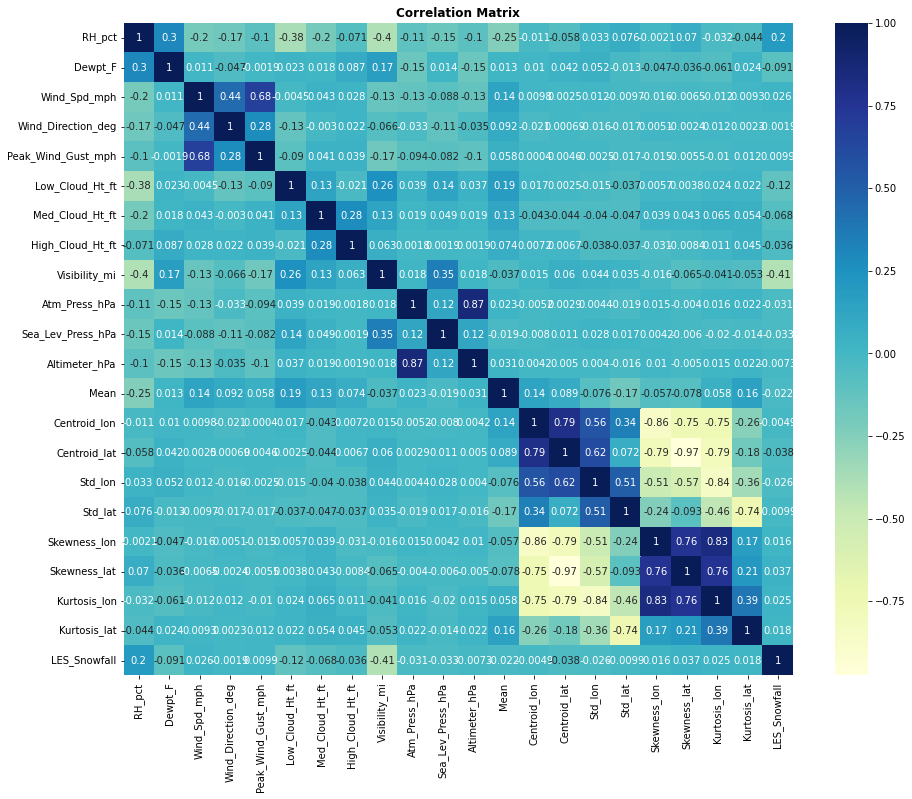

In [23]:
# Correlation 
correlation_matrix = les_copy.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

**Observations from the above correlation plots:**
- Few features are very heavily correated with each other
- We remove the ones that have shown `positive correlation` greater than 0.6
    - **Wind_Spd_mph** is highly correlated with **Peak_Wind_Gust_mph**
    - **Atm_Press_hPa** is highly correlated with **Altimeter_hPa**
    - **Centroid_lon** is highly correalted with **Centroid_lat**
    - **Skewness_lon** is highly correalted with **Skewness_lat**
    - **Skewness_lon** is highly correalted with **Kurtosis_lon**
- We remove the ones that have shown `negative correlation` lesser than -0.6
    - **Centroid_lon** is highly correlated with **Skewness_lon**
    - **Centroid_lon** is highly correlated with **Skewness_lat**
    - **Centroid_lon** is highly correlated with **Kurtosis_lon**
    - **Centroid_lat** is highly correlated with **Skewness_lon**
    - **Centroid_lat** is highly correlated with **Skewness_lat**
    - **Centroid_lat** is highly correlated with **Kurtosis_lon**
    - **Std_lon** is highly correlated with **Kurtosis_lon**

We can drop the above columns since they imply to the same information, and keeping them as features will increase the model size.

In [24]:
les_copy = les_copy.drop(['Peak_Wind_Gust_mph', 'Altimeter_hPa', 'Centroid_lat', 'Centroid_lon', 'Skewness_lon', 'Skewness_lat', 'Kurtosis_lat', 'Kurtosis_lon', 'Std_lat'], axis=1)
les_copy = les_copy.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', les_copy.shape[0])
print('Total number of features: ', les_copy.shape[1])
les_copy.head()

Total observations:  4329
Total number of features:  13


,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon,LES_Snowfall
0,77,51,8,160,0,0,0,10,989.9,1012.6,0.001979,0.665668,0
1,80,52,6,160,0,0,0,10,990.2,1013.1,0.002175,0.670232,0
2,86,53,5,160,0,0,0,10,990.2,1013.2,0.007346,0.649593,0
3,86,59,9,190,0,0,0,10,990.2,1013.0,0.001971,0.656606,0
4,86,60,9,190,4000,0,0,10,990.2,1013.1,0.008081,0.625056,0


Text(0.5, 1.0, 'Correlation Matrix')

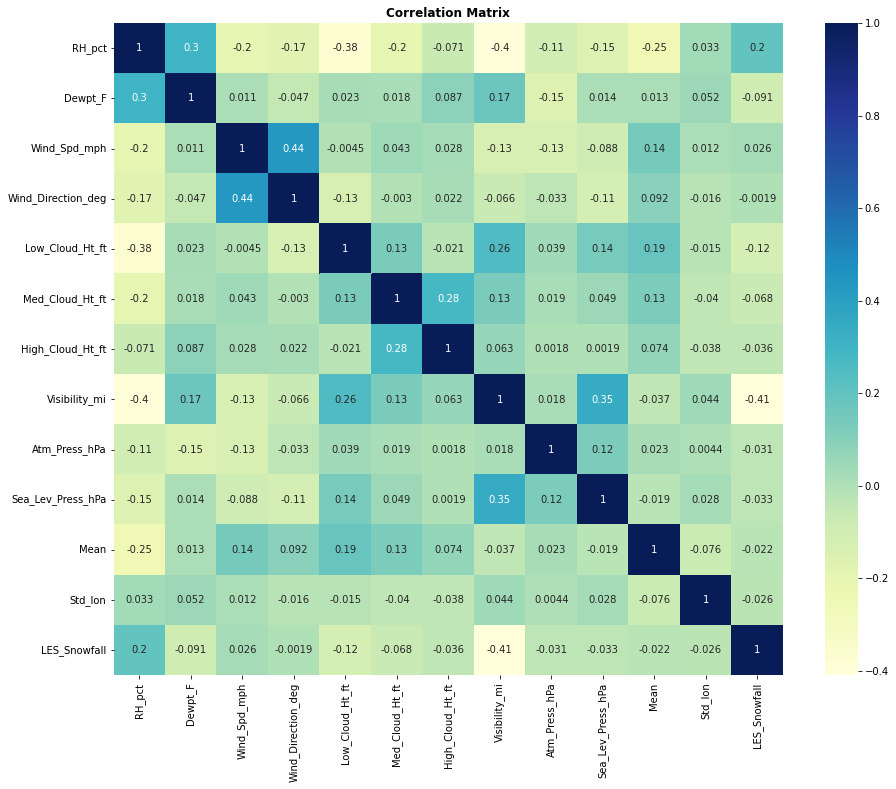

In [25]:
# Correlation 
correlation_matrix = les_copy.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

After dropping the highly correlated features, we are now ready to use the dataset for the model.

#### Plotting pairplot to visualize the non-linear relationships between various features

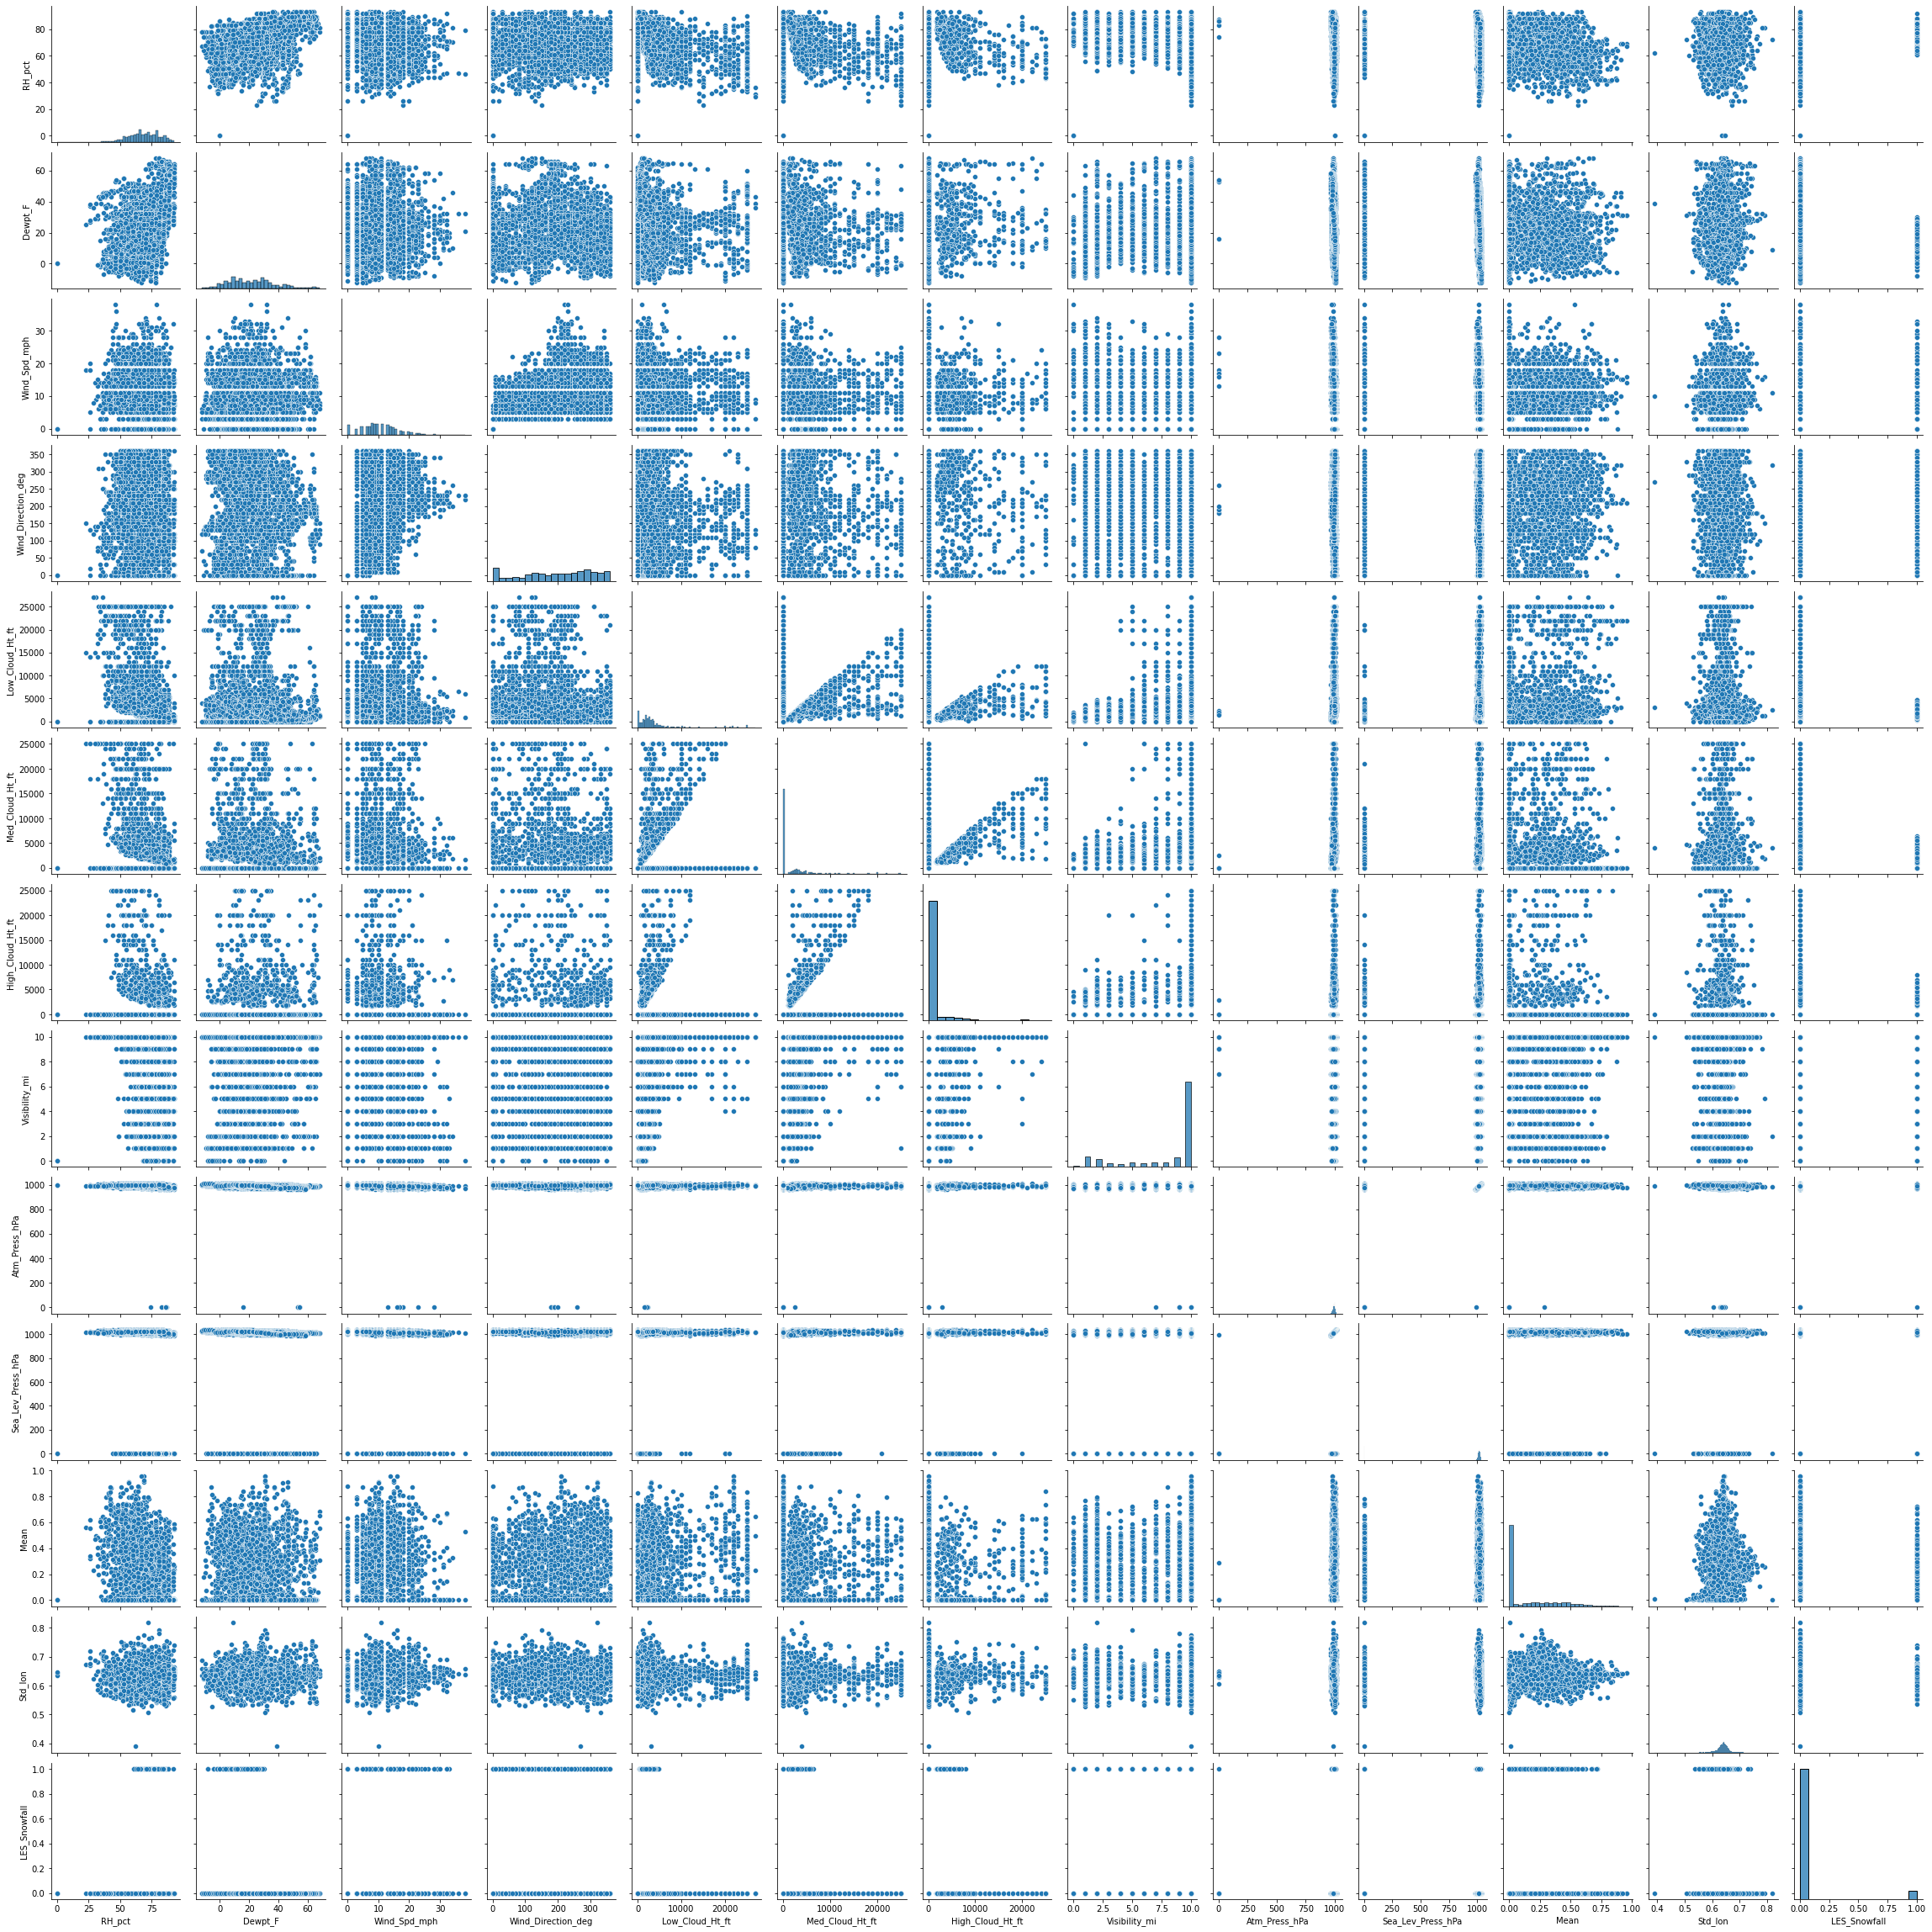

In [26]:
sns.pairplot(les_copy)

#### Distribution of the features in the dataset

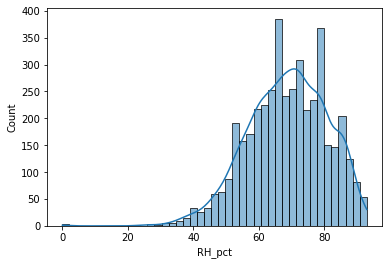

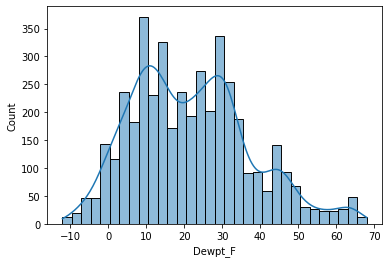

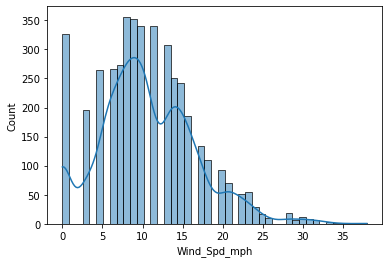

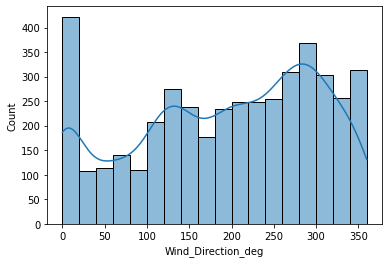

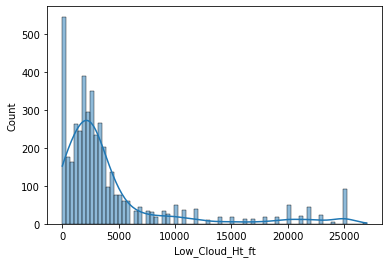

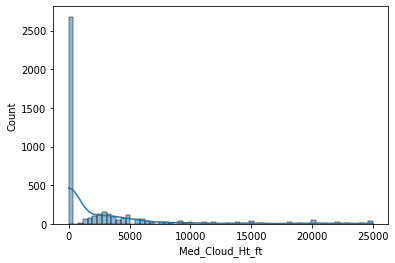

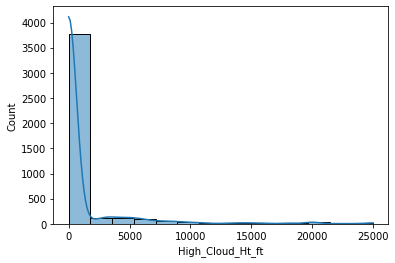

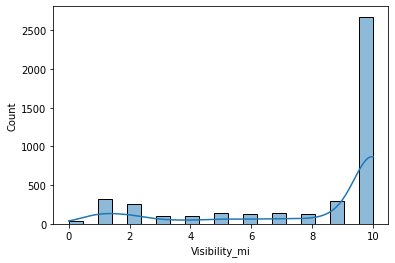

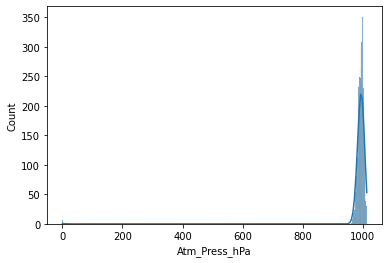

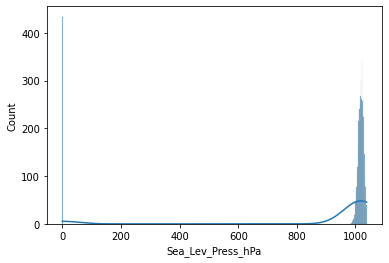

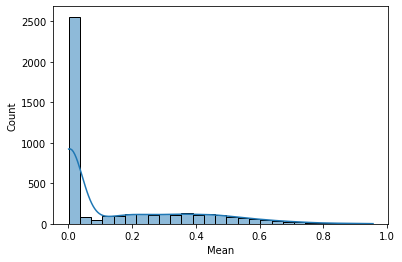

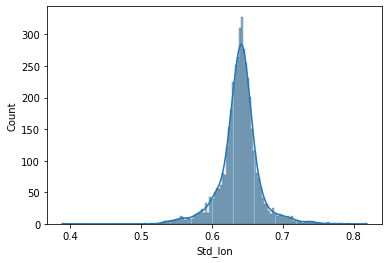

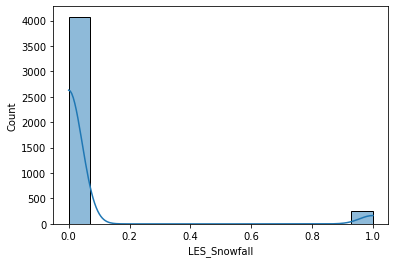

In [27]:
def distPlot(data):
    for feature in data:
        sns.histplot(data[feature], kde=True)
        plt.show()
        
distPlot(les_copy)

#### Visualizing the imbalance in the dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


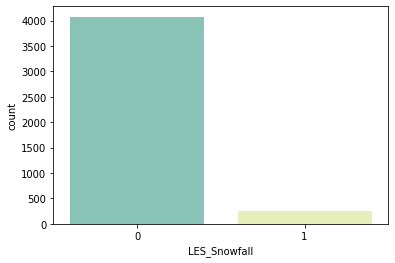

In [28]:
sns.countplot(les_copy['LES_Snowfall'], palette=["#7fcdbb", "#edf8b1"])

## 2. Decision Tree Classifier

#### Entropy of the cleaned dataset

In [29]:
import sys
sys.path.append('pythoncode/')

import simple_ml

# delete 'simple_ml.' in the function call below to test your function
print('Entropy of the dataset = ', simple_ml.entropy(les_copy))

Entropy of the dataset =  0.03442772813762084


#### Separating X and y

In [30]:
X_les = les_copy.loc[:, les_copy.columns != 'LES_Snowfall']
y_les = les_copy.LES_Snowfall

#### Imbalance in the data

In [31]:
y_les.value_counts()

0    4074
1     255
Name: LES_Snowfall, dtype: int64

We can see that the data is heavily imbalanced. As mentioned by professor, the imbalanced data for decision trees is a big problem since it democratically searches for impurity reduction across all observations.

#### Scaling the data

Using `MinMaxScaler` to scale the features and then recreating a dataframe with same column names.

In [32]:
# Fitting MinMaxScaler()
scaler = MinMaxScaler()
# Transform data and put it together into a 
scaled = scaler.fit_transform(X_les)
X_les = pd.DataFrame(scaled, columns = X_les.columns.tolist())
X_les.head()

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon
0,0.827957,0.7875,0.210526,0.444444,0.000000,0.0,0.0,1.0,0.976425,0.975342,0.001222,0.643942
1,0.860215,0.8000,0.157895,0.444444,0.000000,0.0,0.0,1.0,0.976721,0.975824,0.001426,0.654573
2,0.924731,0.8125,0.131579,0.444444,0.000000,0.0,0.0,1.0,0.976721,0.975920,0.006839,0.606505
3,0.924731,0.8875,0.236842,0.527778,0.000000,0.0,0.0,1.0,0.976721,0.975727,0.001213,0.622838
4,0.924731,0.9000,0.236842,0.527778,0.148148,0.0,0.0,1.0,0.976721,0.975824,0.007608,0.549359


#### Data Preparation

##### Function to prepare X & y based on the n_past hours of observations and predicting n_future hours into the future

- The idea behind this data preparation function is to introduce a sliding window over the time series data
- Since we know that time series data has some correlation and cannot be assumed to be independent and identically distributed random variables (i.i.d's), we will have to convert the time series dataset fit for a supervised learning problem
    - For example, if it is snowing at 2pm in the day then it does seem highly likely that it will snow at 3pm as well 
- In the following function we add the following parameters:
    - **n_past** : the number of hours from the past observations to consider for prediction
    - **n_future** :the number of hours into the future that we aim to predict
- `Preparing X with sliding windows`
    - The above operation takes 12 features for every hour of observation
    - After running the function the number of features expand from 12 to (12 * n_past hours) of features
    - The decision tree model will then split at features with highest information gain at each hour of the sliding window
- `Preparing y with sliding windows`
    - We *assume*, that if at any hour **within** the window of now until the **n_future** hour, if the weather is that of snowing (LES_snowfall == 1), then it will snow and y will become 1, else it will be 0

In [33]:
n_past = 1
n_future = 72

def data_prep(X_les = X_les, y_les = y_les, n_past = n_past, n_future = n_future):
    X, y = list(), list()
    for i in range(n_past, len(X_les) - n_future): 
        '''
        1. Sliding window with 1 hour of past data and predicting 72 hours into the future
        (n_past = 1, n_future = 72)
        ==> X_les[ 1-1 : 1 ] = X_les[0 : 1]
        ==> X_les[ 2-1: 2 ] = X_les[1 : 2]
        ==> X_les[ 3-1: 3 ] = X_les[2 : 3] ...
        
        1. Sliding window with 24 hours of past data and predicting 72 hours into the future
        (n_past = 24, n_future = 72)
        ==> X_les[ 24-24 : 24 ] = X_les[0 : 24]
        ==> X_les[ 25-24: 25 ] = X_les[1 : 25]
        ==> X_les[ 26-24: 26 ] = X_les[2 : 26] ...
        '''
        # Preparing X
        # Converting each row of features from the dataframe into an array
        observations = np.array(X_les[i - n_past : i]) 
        # Reshape each observation from the sliding window into a flattened array, then append into list X
        X.append(np.reshape(observations,(-1,))) 
        
        # Preparing y
        # Check if sum of all 0s and 1s from ith hour to i + future_hours > 0, then snowfall = 1
        within_sum = y_les[i : i + n_future].sum()
        if within_sum > 0:
            y.append(1)
        else:
            y.append(0)
        
    return np.array(X), np.array(y)

Let’s assume that given the past 1 hour of observations, we need to forecast the 72 hours into the future.

In [34]:
n_past = 1
n_future = 72

# Index starts from n_past = 1
# X_les[i - n_past : i]
X_les[1 - 1 : 1]

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon
0,0.827957,0.7875,0.210526,0.444444,0.0,0.0,0.0,1.0,0.976425,0.975342,0.001222,0.643942


- Incrementing index by 1 for n_past = 1

In [35]:
n_past = 1
n_future = 72

# Index starts from n_past = 1
# X_les[i - n_past : i]
X_les[2 - 1 : 2]

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon
1,0.860215,0.8,0.157895,0.444444,0.0,0.0,0.0,1.0,0.976721,0.975824,0.001426,0.654573


Let’s assume that given the past 2 hour of observations, we need to forecast the 72 hours into the future.

In [36]:
n_past = 2
n_future = 72

# Index starts from n_past = 2
# X_les[i - n_past : i]
X_les[2 - 2 : 2]

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon
0,0.827957,0.7875,0.210526,0.444444,0.0,0.0,0.0,1.0,0.976425,0.975342,0.001222,0.643942
1,0.860215,0.8000,0.157895,0.444444,0.0,0.0,0.0,1.0,0.976721,0.975824,0.001426,0.654573


- Incrementing index by 1 for n_past = 2

In [37]:
n_past = 2
n_future = 72

# Index starts from n_past = 2
# X_les[i - n_past : i]
X_les[3 - 2 : 3]

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon
1,0.860215,0.8000,0.157895,0.444444,0.0,0.0,0.0,1.0,0.976721,0.975824,0.001426,0.654573
2,0.924731,0.8125,0.131579,0.444444,0.0,0.0,0.0,1.0,0.976721,0.975920,0.006839,0.606505


In [38]:
n_past = 24
n_future = 72

# Index starts from n_past = 24
# X_les[i - n_past : i]
X_les[24 - 24 : 24]

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon
0,0.827957,0.7875,0.210526,0.444444,0.000000,0.000,0.0,1.0,0.976425,0.975342,0.001222,0.643942
1,0.860215,0.8000,0.157895,0.444444,0.000000,0.000,0.0,1.0,0.976721,0.975824,0.001426,0.654573
2,0.924731,0.8125,0.131579,0.444444,0.000000,0.000,0.0,1.0,0.976721,0.975920,0.006839,0.606505
3,0.924731,0.8875,0.236842,0.527778,0.000000,0.000,0.0,1.0,0.976721,0.975727,0.001213,0.622838
4,0.924731,0.9000,0.236842,0.527778,0.148148,0.000,0.0,1.0,0.976721,0.975824,0.007608,0.549359
5,0.967742,0.9000,0.236842,0.527778,0.925926,0.000,0.0,1.0,0.976721,0.975824,0.001446,0.589093
6,0.956989,0.9125,0.289474,0.555556,0.025926,0.800,0.0,0.5,0.976721,0.975920,0.091985,0.585662
7,0.967742,0.9250,0.289474,0.527778,0.018519,0.000,0.0,0.6,0.977116,0.976113,0.232094,0.461807
8,0.935484,0.9250,0.394737,0.555556,0.018519,0.000,0.0,0.7,0.977116,0.976305,0.259125,0.392453
9,0.892473,0.9125,0.526316,0.555556,0.025926,0.000,0.0,0.6,0.977708,0.976690,0.257700,0.356656


- Incrementing index by 1 for n_past = 24

In [39]:
n_past = 24
n_future = 72

# Index starts from n_past = 24
# X_les[i - n_past : i]
X_les[25 - 24 : 25]

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon
1,0.860215,0.8000,0.157895,0.444444,0.000000,0.000,0.0,1.0,0.976721,0.975824,0.001426,0.654573
2,0.924731,0.8125,0.131579,0.444444,0.000000,0.000,0.0,1.0,0.976721,0.975920,0.006839,0.606505
3,0.924731,0.8875,0.236842,0.527778,0.000000,0.000,0.0,1.0,0.976721,0.975727,0.001213,0.622838
4,0.924731,0.9000,0.236842,0.527778,0.148148,0.000,0.0,1.0,0.976721,0.975824,0.007608,0.549359
5,0.967742,0.9000,0.236842,0.527778,0.925926,0.000,0.0,1.0,0.976721,0.975824,0.001446,0.589093
6,0.956989,0.9125,0.289474,0.555556,0.025926,0.800,0.0,0.5,0.976721,0.975920,0.091985,0.585662
7,0.967742,0.9250,0.289474,0.527778,0.018519,0.000,0.0,0.6,0.977116,0.976113,0.232094,0.461807
8,0.935484,0.9250,0.394737,0.555556,0.018519,0.000,0.0,0.7,0.977116,0.976305,0.259125,0.392453
9,0.892473,0.9125,0.526316,0.555556,0.025926,0.000,0.0,0.6,0.977708,0.976690,0.257700,0.356656
10,0.903226,0.9250,0.526316,0.583333,0.025926,0.000,0.0,0.9,0.977412,0.976401,0.323977,0.430476


#### Predicting 72 hours in advance based on 1 hour of historical data/observation

In [40]:
# Preparing data
X, y = data_prep()

In [41]:
print('Length of X and y: ', len(X))

Length of X and y:  4256


#### Splitting the data

In [42]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Since the dataset is imbalanced, we will now have to use a **weighted decision tree**.

##### Gridsearch for best parameters to deal with imbalanced classes

In [43]:
# Decision Tree Classifier Parameters
dtree_param_grid = {'class_weight' : [{0 : 1, 1 : 100}, {0 : 1, 1 : 10}], 
                    'max_depth': range(1, 20, 2), 
                    'max_features': list(range(1, 21, 2)),
                    'min_samples_split': range(10, 50, 10), 
                    'criterion': ['gini', 'entropy']
                    }

In [ ]:
# Define DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# Define grid search
grid = GridSearchCV(estimator=model, param_grid = dtree_param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit
grid_result = grid.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

#### Saving the model with the best estimated hyperparameters

In [45]:
# Best estimator value
best_model = grid_result.best_estimator_

# Save pickled model
pickle.dump(best_model, open('models/mich_1_72_model.pkl', 'wb'))

#### Evaluating the model with best estimated hyperparameters

In [46]:
# Evaluations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean (%f) and Std dev (%f) with: %r" % (mean, stdev, param))

Mean (0.528010) and Std dev (0.035724) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 10}
Mean (0.527958) and Std dev (0.043864) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 20}
Mean (0.544856) and Std dev (0.063860) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 30}
Mean (0.555887) and Std dev (0.059850) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 40}
Mean (0.520254) and Std dev (0.027037) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'min_samples_split': 10}
Mean (0.546553) and Std dev (0.062810) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'min_samples_split': 20}
Mean (0.536021) and Std dev (0.038353) with: {

#### Loading the saved model and performing prediction on test dataset

In [47]:
# Load pickled model
pickled_model = pickle.load(open('models/mich_1_72_model.pkl', 'rb'))

# Decision Tree
y_pred = pickled_model.predict(X_test)

# Result
print(f'False Predictions: {(abs(y_pred-y_test)).sum()}/{len(y_pred)} | Accuracy: {(1-(abs(y_pred-y_test)).sum()/len(y_pred))*100}')

False Predictions: 228/1064 | Accuracy: 78.57142857142857


#### Evaluation metrics for classification: ROC-AUC, Recall, Precision, F1-Score

In [48]:
print("ROC-AUC: {}".format(roc_auc_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1-Score: {}".format(f1_score(y_test, y_pred)))

ROC-AUC: 0.7725318234067009
Recall: 0.9787985865724381
Precision: 0.7194805194805195
F1-Score: 0.8293413173652694


#### Saving the feature names for n_past hours of observation

As the n_past hours increase, the feature set increases to 12 * n_past.

In [49]:
# Saving the feature names 
feature_names = X_les.columns.tolist()
n_past = 1
features_extended = []
for i in range(n_past):
    for feature in feature_names:
        features_extended.append(feature + f'_{i}')

#### Exporting and rendering the generated Decision Tree

In [50]:
export_graphviz(pickled_model, 'tree.dot', feature_names = features_extended)

In [51]:
!dot -Tpng tree.dot -o mich_1_72_tree.png

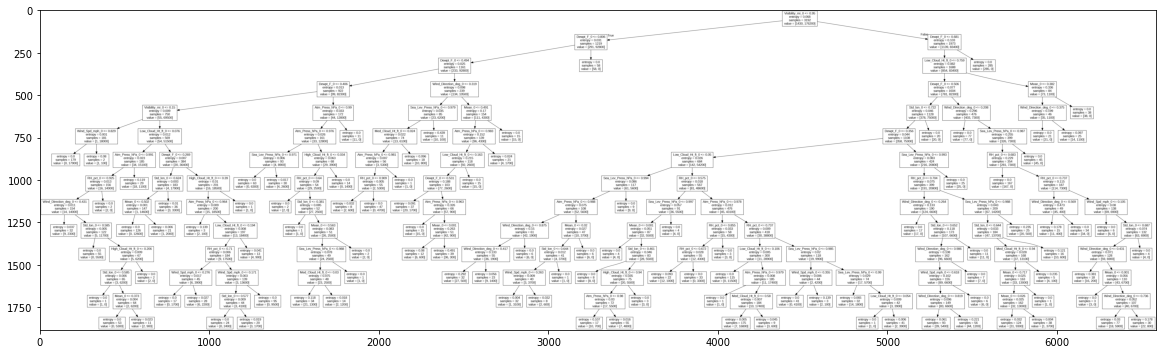

In [52]:
img = cv2.imread('mich_1_72_tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

#### Calculating Feature Importance for the model

In [53]:
# Feature importance
from operator import itemgetter
importances_sk = best_model.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features_extended):
    feature_importance_sk[feature] = round(importances_sk[i], 3)
res = dict(sorted(feature_importance_sk.items(), key = itemgetter(1), reverse = True)[:10])
print(f"Feature importance by sklearn: {res}")

Feature importance by sklearn: {'Dewpt_F_0': 0.409, 'RH_pct_0': 0.142, 'Wind_Direction_deg_0': 0.118, 'Sea_Lev_Press_hPa_0': 0.07, 'Visibility_mi_0': 0.057, 'Mean_0': 0.052, 'Atm_Press_hPa_0': 0.044, 'Std_lon_0': 0.044, 'Low_Cloud_Ht_ft_0': 0.036, 'Wind_Spd_mph_0': 0.013}


**Observation:**
- We perform hyperparameter tuning to optimize the values for the following parameters
    - class_weight
        - The majority class (0: not snowing) received a weight of 1
        - The minority class (1: not snowing) received a weight of 100
    - 'max_depth'
        - To control the depth of the tree so that we do not overfit the model, which came out to be 13
    - 'max_features'
        - The optimal number of features to consider when looking for the best split, which came out to be 9
    - 'min_samples_split'
        - specifies the minimum number of samples required to split an internal node, which came out to be 40
- From the model with a sliding window of only 1 hour and predicting 72 hours ahead gets
    - ROC-AUC = 0.77
    - F1-Score = 0.83
    - Accuracy = 78.57 %
- Overall, the F-1 score, Accuracy and ROC-AUC are quite good for this model
- From the above result we see that the split happens at
    - Dewpt (F)
    - RH (pct)
    - Wind_Direction (deg)...and so on and so forth until the decision tree is terminated

#### Predicting 72 hours in advance based on 24 hour of historical data/observation

Preparing the dataset.

In [54]:
# Preparing data
X, y = data_prep(X_les, y_les, 24, 72)
print('Length of X and y: ', len(X))

Length of X and y:  4233


#### Splitting data into Train and Test datasets

In [55]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Gridsearch for best parameters to deal with imbalanced classes

In [56]:
dtree_param_grid = {'class_weight' : [{0 : 1, 1 : 100}, {0 : 1, 1 : 10}], 
                    'max_depth': range(1, 20, 2), 
                    'max_features': list(range(1, 21, 2)),
                    'min_samples_split': range(10, 50, 10), 
                    'criterion': ['gini', 'entropy']
                    }

# Define DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# Define grid search
grid = GridSearchCV(estimator=model, param_grid = dtree_param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit
grid_result = grid.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.9230106100795757
Best Hyperparameters: {'class_weight': {0: 1, 1: 10}, 'criterion': 'entropy', 'max_depth': 13, 'max_features': 17, 'min_samples_split': 30}


#### Saving the model with the best estimated hyperparameters

In [57]:
# Best estimator value
best_model = grid_result.best_estimator_

# Save pickled model
pickle.dump(best_model, open('models/mich_24_72_model.pkl', 'wb'))

#### Evaluating the model with best estimated hyperparameters

In [58]:
# Evaluations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean (%f) and Std dev (%f) with: %r" % (mean, stdev, param))

Mean (0.532105) and Std dev (0.040374) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 10}
Mean (0.533217) and Std dev (0.044368) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 20}
Mean (0.544452) and Std dev (0.052110) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 30}
Mean (0.522512) and Std dev (0.036095) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_split': 40}
Mean (0.531942) and Std dev (0.046701) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'min_samples_split': 10}
Mean (0.534184) and Std dev (0.038222) with: {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'min_samples_split': 20}
Mean (0.545448) and Std dev (0.052725) with: {

#### Loading the saved model and performing prediction on test dataset

In [59]:
# Load pickled model
pickled_model = pickle.load(open('models/mich_24_72_model.pkl', 'rb'))

# Decision Tree
y_pred = pickled_model.predict(X_test)

# Result
print(f'False Predictions: {(abs(y_pred-y_test)).sum()}/{len(y_pred)} | Accuracy: {(1-(abs(y_pred-y_test)).sum()/len(y_pred))*100}')

False Predictions: 157/1059 | Accuracy: 85.17469310670444


#### Evaluation metrics for classification: ROC-AUC, Recall, Precision, F1-Score

In [60]:
# Result
print("ROC-AUC: {}".format(roc_auc_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1-Score: {}".format(f1_score(y_test, y_pred)))

ROC-AUC: 0.8390591204037491
Recall: 0.9623287671232876
Precision: 0.806312769010043
F1-Score: 0.87743950039032


#### Saving the feature names for n_past hours of observation

In [61]:
# Saving the feature names 
feature_names = X_les.columns.tolist()

features_extended = []
n_past = 24
for i in range(n_past):
    for feature in feature_names:
        features_extended.append(feature + f'_{i}')

#### Exporting and rendering the generated Decision Tree

In [62]:
export_graphviz(pickled_model, 'tree.dot', feature_names = features_extended)
!dot -Tpng tree.dot -o mich_24_72_tree.png

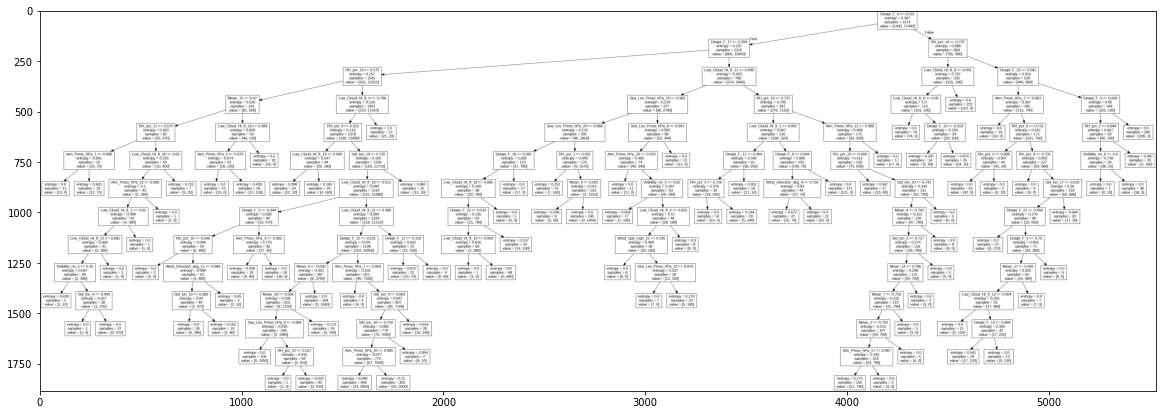

In [63]:
# Plotting decision tree
img = cv2.imread('mich_24_72_tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

#### Calculating Feature Importance for the model

In [64]:
# Feature importance
from operator import itemgetter
importances_sk = best_model.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features_extended):
    feature_importance_sk[feature] = round(importances_sk[i], 3)
res = dict(sorted(feature_importance_sk.items(), key = itemgetter(1), reverse = True)[:10])
print(f"Feature importance by sklearn: {res}")

Feature importance by sklearn: {'Dewpt_F_4': 0.272, 'Dewpt_F_3': 0.06, 'Dewpt_F_23': 0.045, 'Dewpt_F_17': 0.039, 'Low_Cloud_Ht_ft_11': 0.037, 'RH_pct_14': 0.033, 'RH_pct_2': 0.028, 'Low_Cloud_Ht_ft_8': 0.024, 'Low_Cloud_Ht_ft_1': 0.023, 'RH_pct_16': 0.021}


**Observation:**
- We perform hyperparameter tuning to optimize the values for the following parameters
    - class_weight
        - The majority class (0: not snowing) received a weight of 1
        - The minority class (1: not snowing) received a weight of 10
    - 'max_depth'
        - To control the depth of the tree so that we do not overfit the model, which came out to be 13
    - 'max_features'
        - The optimal number of features to consider when looking for the best split, which came out to be 17
    - 'min_samples_split'
        - specifies the minimum number of samples required to split an internal node, which came out to be 30
- From the model with a sliding window of only 24 hours and predicting 72 hours ahead gets
    - Accuracy: 85.17%
    - ROC-AUC: 0.84
    - F1-Score: 0.88
- Overall, the F-1 score, Accuracy and ROC-AUC are quite good for this model, and it saw an improvement over the last model with 1 hour of sliding window
- For every hour the model chooses the feature with the maximum information gain and splits on that node
    - Dewpt (F) has the maximum information gain
    - Followed by Low_Cloud_Ht (ft), and Sea_Lev_Press (hPa)...and so on and so forth until the decision tree is terminated 

## 3. SVM

#### Using previously scaled data
Using scaled X_les and y_les for SVM

In [65]:
X_les.head()

,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Mean,Std_lon
0,0.827957,0.7875,0.210526,0.444444,0.000000,0.0,0.0,1.0,0.976425,0.975342,0.001222,0.643942
1,0.860215,0.8000,0.157895,0.444444,0.000000,0.0,0.0,1.0,0.976721,0.975824,0.001426,0.654573
2,0.924731,0.8125,0.131579,0.444444,0.000000,0.0,0.0,1.0,0.976721,0.975920,0.006839,0.606505
3,0.924731,0.8875,0.236842,0.527778,0.000000,0.0,0.0,1.0,0.976721,0.975727,0.001213,0.622838
4,0.924731,0.9000,0.236842,0.527778,0.148148,0.0,0.0,1.0,0.976721,0.975824,0.007608,0.549359


In [66]:
y_les.head()

0    0
1    0
2    0
3    0
4    0
Name: LES_Snowfall, dtype: int64

#### Imbalance in the data

In [67]:
y_les.value_counts()

0    4074
1     255
Name: LES_Snowfall, dtype: int64

#### Predicting 72 hours in advance based on 1 hour of historical data/observation

In [68]:
# Preparing data
X, y = data_prep(X_les, y_les, 1, 72)

In [69]:
print('Length of X and y: ', len(X))

Length of X and y:  4256


#### Splitting the data

In [70]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##### Gridsearch for best parameters

In [71]:
# SVC Parameters
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],  
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [72]:
# Define SVC model
model = SVC()

# Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# Define grid search
grid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit
grid_result = grid.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.9225970937732303
Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


#### Saving the model with the best estimated hyperparameters

In [74]:
# Best estimator value
best_model = grid_result.best_estimator_

# Save pickled model
pickle.dump(best_model, open('models/svm_1_72.pkl', 'wb'))

#### Evaluating the model with best estimated hyperparameters

In [75]:
# Evaluations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean (%f) and Std dev (%f) with: %r" % (mean, stdev, param))

Mean (0.883425) and Std dev (0.020099) with: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Mean (0.899340) and Std dev (0.014290) with: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Mean (0.886659) and Std dev (0.017871) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean (0.411453) and Std dev (0.031089) with: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
Mean (0.883425) and Std dev (0.020099) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Mean (0.845276) and Std dev (0.025689) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Mean (0.875449) and Std dev (0.021182) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean (0.870119) and Std dev (0.022234) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Mean (0.883425) and Std dev (0.020099) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mean (0.843370) and Std dev (0.025900) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Mean (0.865404) and Std dev (0.023653) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean (0.865485) and Std dev 

#### Loading the saved model and performing prediction on test dataset

In [76]:
# Load pickled model
pickled_model = pickle.load(open('models/svm_1_72.pkl', 'rb'))

# SVM
y_pred = pickled_model.predict(X_test)
# Result
print(f'False Predictions: {(abs(y_pred-y_test)).sum()}/{len(y_pred)} | Accuracy: {(1-(abs(y_pred-y_test)).sum()/len(y_pred))*100}')

False Predictions: 136/1064 | Accuracy: 87.21804511278195


#### Evaluation metrics for classification: ROC-AUC, Recall, Precision, F1-Score

In [77]:
print("ROC-AUC: {}".format(roc_auc_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1-Score: {}".format(f1_score(y_test, y_pred)))

ROC-AUC: 0.8692731516182775
Recall: 0.9089316987740805
Precision: 0.8606965174129353
F1-Score: 0.8841567291311754


**Observation:**
- After hyperparameter tuning we get the following optimized parameters: 
    - 'C' = 100
    - 'gamma' = 1
    - 'kernel' = 'rbf'
- From the model with a sliding window of only 1 hours and predicting 72 hours ahead gets
    - Accuracy: 87.22%
    - ROC-AUC: 0.87
    - F1-Score: 0.88
- Overall, the F-1 score, Accuracy and ROC-AUC are better for this model as compared to any of the Decision tree model
- High value of 'C; and 'gamma' as the best parameter indicates that our model tried to minimize the failed prediction while searching for the optimal hyperplane
- The predictibility is better using the SVM for the dataset


#### Predicting 72 hours in advance based on 24 hour of historical data/observation

In [80]:
# Preparing data
X, y = data_prep(X_les, y_les, 24, 72)
print('Length of X and y: ', len(X))

Length of X and y:  4233


#### Splitting the data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Since the dataset is imbalanced, we will now have to use a **weighted decision tree**.

#### Gridsearch for best parameters to deal with imbalanced classes

In [82]:
# SVC Parameters
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],  
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Define SVM model
model = SVC()

# Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# Define grid search
grid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit
grid_result = grid.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.9886346362072443
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


#### Saving the model with the best estimated hyperparameters

In [83]:
# Best estimator value
best_model = grid_result.best_estimator_

# Save pickled model
pickle.dump(best_model, open('models/svm_24_72.pkl', 'wb'))

#### Evaluating the model with best estimated hyperparameters

In [84]:
# Evaluations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean (%f) and Std dev (%f) with: %r" % (mean, stdev, param))

Mean (0.913537) and Std dev (0.014686) with: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Mean (0.970461) and Std dev (0.007817) with: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Mean (0.952820) and Std dev (0.009654) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean (0.500000) and Std dev (0.000000) with: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
Mean (0.913537) and Std dev (0.014686) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Mean (0.970218) and Std dev (0.007722) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Mean (0.907888) and Std dev (0.015101) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean (0.262762) and Std dev (0.028563) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Mean (0.913537) and Std dev (0.014686) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mean (0.893900) and Std dev (0.015557) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Mean (0.891297) and Std dev (0.016380) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean (0.882809) and Std dev 

#### Loading the saved model and performing prediction on test dataset

In [85]:
# Load pickled model
pickled_model = pickle.load(open('models/svm_24_72.pkl', 'rb'))

# SVM
y_pred = pickled_model.predict(X_test)

# Result
print(f'False Predictions: {(abs(y_pred-y_test)).sum()}/{len(y_pred)} | Accuracy: {(1-(abs(y_pred-y_test)).sum()/len(y_pred))*100}')

False Predictions: 33/1059 | Accuracy: 96.88385269121812


#### Evaluation metrics for classification: ROC-AUC, Recall, Precision, F1-Score

In [86]:
print("ROC-AUC: {}".format(roc_auc_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1-Score: {}".format(f1_score(y_test, y_pred)))

ROC-AUC: 0.9670074148729393
Recall: 0.9862068965517241
Precision: 0.9581239530988275
F1-Score: 0.9719626168224299


**Observation:**
Hmm… That’s interesting! Given that the best parameter for ‘C’ is 10, our model looks for a large-margin separating the hyperplane. Our model uses ‘gamma’ as 0.1, which indicates that far away points are also considered. 

- After hyperparameter tuning we get the following optimized parameters: 
    - 'C' = 10
    - 'gamma' = 0.1
    - 'kernel' = 'rbf'
- From the model with a sliding window of only 1 hours and predicting 72 hours ahead gets
    - Accuracy: 96.88%
    - ROC-AUC: 0.97
    - F1-Score: 0.97
- Overall the F-1 score, Accuracy and ROC-AUC is the best by far for the dataset
- The predictibility is better using the SVM for the dataset when 24 hours of data is considered

# Conclusion
- To tackle the imbalance problem and the overfitting in our models, we performed hyperparameter tuning using GridsearchCV
- When we gave the model a larger sliding window of 24 hours of observations, the overall evaluation results improve for each of the dataset
- `The predictibility of 'Lake Effect Snow (LES)' is much higer for SVM as it tries to divide the imbalanced dataset with minimum failed classification`

**Best Results for each of the model is when we use 24 hours of sliding window for 72 hours of advance prediction:**
- `Decision Tree`
    - **Accuracy**: 87.22%
    - **ROC-AUC**: 0.87
    - **Recall**: 0.91
    - **Precision**: 0.86
    - **F1-Score**: 0.88
- `SVM`
    - **Accuracy**: 96.98%
    - **ROC-AUC**: 0.97
    - **Recall**: 0.99
    - **Precision**: 0.96
    - **F1-Score**: 0.97

**SVM performs the best at an accuracy of 96.98% for the dataset when 24 hours of data is used to predict 72 hours in advance.**